# Facial Expression Recognition

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

from tensorflow import keras
from keras import Model, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Add, BatchNormalization, Activation, Dropout, PReLU
from keras.regularizers import l1, l2, l1_l2
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [2]:
df = {}
for expression in os.listdir(r"D:\Utkarsh Mathur\Career\Data Science\Datasets\FER 2013\train/"):
    directory = r"D:\Utkarsh Mathur\Career\Data Science\Datasets\FER 2013\train/" + expression
    df[expression] = len(os.listdir(directory))
df = pd.DataFrame(df, index=[0])

In [3]:
img_size = 48
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(r"D:\Utkarsh Mathur\Career\Data Science\Datasets\FER 2013\train/", target_size = (img_size, img_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

test_generator = test_datagen.flow_from_directory(r"D:\Utkarsh Mathur\Career\Data Science\Datasets\FER 2013\test/", target_size = (img_size, img_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

Found 31444 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# Building Block for res-Net
def convolution_block(feed, f1, f2, f):
    shortcut =  feed
    
    # For the convolutional part
    mix = Conv2D(filters = f1, kernel_size=(3,3), padding = "Same", activation = 'relu', kernel_regularizer=l2(1e-4))(feed)
    mix = Conv2D(filters = f1, kernel_size=(3,3), padding = "Same", kernel_regularizer=l2(1e-4))(mix)

    # For the shortcut path
    # X_shortcut = Conv2D(filters = f1, kernel_size=(1,1), padding = "Same",kernel_regularizer=l2(1e-4))(X_shortcut)

    mix = Add()([shortcut,mix])
    mix = PReLU(alpha_initializer='zeros')(mix)

    mix = Conv2D(filters = f2, activation = 'relu', kernel_size=(f,f), padding = "Valid", kernel_regularizer=l2(1e-4))(mix)
    
    return mix

# Deep Convolution Neural Network

In [5]:
model2 = Sequential()

model2.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding = "Same", input_shape=(48,48,1))) # Output is 48*48*16
model2.add(BatchNormalization())
model2.add(Conv2D(32,kernel_size=(3,3),activation='relu', padding = "Same")) # Output is 48*48*32
model2.add(MaxPooling2D((2,2), strides=2)) # Output is 24*24*32
model2.add(BatchNormalization())

model2.add(Conv2D(64,kernel_size=(3,3),activation='relu', padding = "Same")) # Output is 24*24*64
model2.add(MaxPooling2D((2,2), strides=2)) # Output is 12*12*64
model2.add(BatchNormalization())

model2.add(Conv2D(128,kernel_size=(3,3),activation='relu', padding = "Same")) # Output is 12*12*128
model2.add(MaxPooling2D((2,2),strides=2)) # Output is 6*6*128
model2.add(BatchNormalization())

model2.add(Conv2D(256,kernel_size=(3,3),activation='relu', padding = "Same")) # Output is 6*6*256
model2.add(MaxPooling2D((2,2),strides=2)) # Output is 3*3*256
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(120, activation='relu'))
model2.add(BatchNormalization())

model2.add(Dense(7, activation='softmax'))

In [6]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0

In [7]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

In [8]:
model2.compile(loss="categorical_crossentropy", optimizer=optimizer , metrics=["accuracy"])
history2 = model2.fit(train_generator,shuffle=True, batch_size=batch_size, epochs=60, validation_data=test_generator, validation_steps=113)

Epoch 1/60
983/983 [==============================] - 211s 215ms/step - loss: 1.7420 - accuracy: 0.3242 - val_loss: 1.4675 - val_accuracy: 0.4524
Epoch 2/60
983/983 [==============================] - 207s 211ms/step - loss: 1.4033 - accuracy: 0.4664 - val_loss: 1.3604 - val_accuracy: 0.4757
Epoch 3/60
983/983 [==============================] - 217s 220ms/step - loss: 1.2900 - accuracy: 0.5117 - val_loss: 1.3216 - val_accuracy: 0.4961
Epoch 4/60
983/983 [==============================] - 212s 216ms/step - loss: 1.2249 - accuracy: 0.5377 - val_loss: 1.2634 - val_accuracy: 0.5050
Epoch 5/60
983/983 [==============================] - 196s 200ms/step - loss: 1.1828 - accuracy: 0.5539 - val_loss: 1.3198 - val_accuracy: 0.5022
Epoch 6/60
983/983 [==============================] - 192s 195ms/step - loss: 1.1491 - accuracy: 0.5657 - val_loss: 1.2847 - val_accuracy: 0.5216
Epoch 7/60
983/983 [==============================] - 192s 195ms/step - loss: 1.1302 - accuracy: 0.5742 - val_loss: 1.1530 -

In [9]:
score2 = model2.evaluate(test_generator, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

Test loss: 0.9900674223899841
Test accuracy: 0.6380607485771179


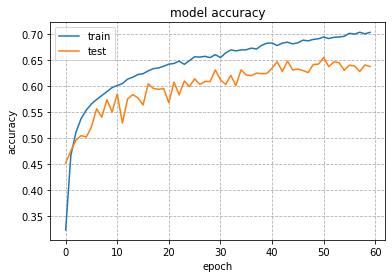

In [10]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(linestyle="--")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

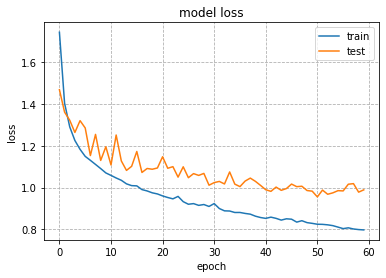

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(linestyle="--")
plt.legend(['train', 'test'], loc='upper right')
plt.show()